<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW7/mltsa_hw7_rclarke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLTSA - HW7 - Riley Clarke

In [1]:
!pip install python_speech_features
!pip install PyGithub
!pip install pydub

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=2a2341d28a83bc22bbd177c9ee73e6c0cfc43b2121a3083aef7977ef8838b5f0
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features
     |████████████████████████████████| 215kB 2.7MB/s 


In [0]:
import sys
import os
import numpy as np
import glob as glob

import scipy.io.wavfile as wav
from python_speech_features import mfcc
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from scipy.spatial.distance import cdist, euclidean
from scipy.spatial import distance_matrix

from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
%matplotlib inline

In [0]:
np.set_printoptions(threshold=sys.maxsize)
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
!mkdir MLTSA2020

In [10]:
cd MLTSA2020

/content/gdrive/My Drive/MLTSA2020


In [0]:
!mkdir data

In [13]:
cd data

/content/gdrive/My Drive/MLTSA2020/data


In [0]:
from github import Github

g = Github()

In [0]:
guser = g.get_user("salik-a")
repo = guser.get_repo("Speech_Recognition")

In [16]:
wavfiles = repo.get_contents("voices")
#.repos_url#("Speech_Recognition")
wavfiles

[ContentFile(path="voices/Jarvis_template.wav"),
 ContentFile(path="voices/Jarvisd_template.wav"),
 ContentFile(path="voices/Jarvise_template.wav"),
 ContentFile(path="voices/Jarvish_template.wav"),
 ContentFile(path="voices/Jarvisu_template.wav"),
 ContentFile(path="voices/Tofftl_template.wav"),
 ContentFile(path="voices/Tofftld_template.wav"),
 ContentFile(path="voices/Tofftle_template.wav"),
 ContentFile(path="voices/Tofftlh_template.wav"),
 ContentFile(path="voices/Tofftlu_template.wav"),
 ContentFile(path="voices/Tontl_template.wav"),
 ContentFile(path="voices/Tontld_template.wav"),
 ContentFile(path="voices/Tontle_template.wav"),
 ContentFile(path="voices/Tontlh_template.wav"),
 ContentFile(path="voices/Tontlu_template.wav"),
 ContentFile(path="voices/Tontt_template.wav"),
 ContentFile(path="voices/Tonttd_template.wav"),
 ContentFile(path="voices/Tontte_template.wav"),
 ContentFile(path="voices/Tontth_template.wav"),
 ContentFile(path="voices/Tonttu_template.wav"),
 ContentFile(p

In [0]:
path = "https://raw.githubusercontent.com/salik-a/Speech_Recognition/master/"
for f in wavfiles:
    cmd = "wget " + "%s/%s"%(path,f.path)
    os.system(cmd)

In [18]:
ls

Jarvisd_template.wav  Tofftlu_template.wav  Tontt_template.wav
Jarvise_template.wav  Tontld_template.wav   Tonttu_template.wav
Jarvish_template.wav  Tontle_template.wav   Ttatd_template.wav
Jarvis_template.wav   Tontlh_template.wav   Ttate_template.wav
Jarvisu_template.wav  Tontl_template.wav    Ttath_template.wav
Tofftld_template.wav  Tontlu_template.wav   Ttat_template.wav
Tofftle_template.wav  Tonttd_template.wav   Ttatu_template.wav
Tofftlh_template.wav  Tontte_template.wav
Tofftl_template.wav   Tontth_template.wav


In [19]:
cd ../

/content/gdrive/My Drive/MLTSA2020


In [25]:
filenames = np.sort(glob.glob("data/*wav"))
norm_obj= Normalize(vmin=0, vmax=4)
colors = {"Jarvis": (plt.cm.viridis(norm_obj(0)),
                     "Jarvis"),
         "Tofftl": (plt.cm.viridis(norm_obj(1)),
                    "Turn off the lights"),
         "Tontl": (plt.cm.viridis(norm_obj(2)),
                   "Turn on the lights"),
         "Tontt": (plt.cm.viridis(norm_obj(3)),
                   "Turn on the TV"),
         "Ttat": (plt.cm.viridis(norm_obj(4)),
                  "Turn the air temperature")}
y = np.array([[k for k,v in colors.items() for i in range(5)]])[0]
y

array(['Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Jarvis', 'Tofftl',
       'Tofftl', 'Tofftl', 'Tofftl', 'Tofftl', 'Tontl', 'Tontl', 'Tontl',
       'Tontl', 'Tontl', 'Tontt', 'Tontt', 'Tontt', 'Tontt', 'Tontt',
       'Ttat', 'Ttat', 'Ttat', 'Ttat', 'Ttat'], dtype='<U6')

In [26]:
for k,v in colors.items():
        print(k,v)

Jarvis ((0.267004, 0.004874, 0.329415, 1.0), 'Jarvis')
Tofftl ((0.229739, 0.322361, 0.545706, 1.0), 'Turn off the lights')
Tontl ((0.127568, 0.566949, 0.550556, 1.0), 'Turn on the lights')
Tontt ((0.369214, 0.788888, 0.382914, 1.0), 'Turn on the TV')
Ttat ((0.993248, 0.906157, 0.143936, 1.0), 'Turn the air temperature')


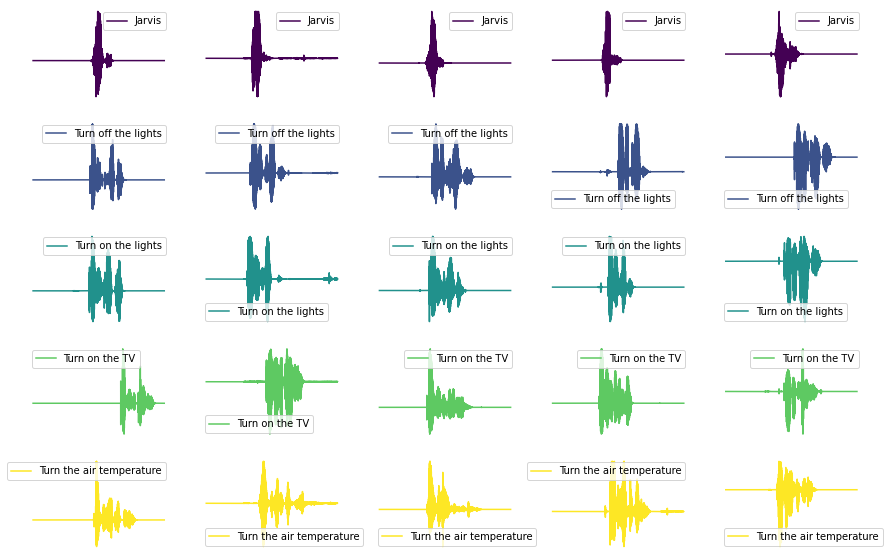

In [29]:
fig = plt.figure(figsize=(15, 10))
wavfiles = []
from pydub import AudioSegment
from pydub.playback import play
for i,f in enumerate(filenames):
    ax = fig.add_subplot(5,5,i+1)
    phrase = AudioSegment.from_wav(f)
    play(phrase)
    wavfiles.append(wav.read(f))
    for k,v in colors.items():
        if k in f: 
            color = colors[k][0]
            label = colors[k][1]
    ax.plot(wavfiles[-1][1], label=label, color=color)
    ax.axis('off')              
    plt.legend()

In [38]:
wavfiles = np.array([w[1] for w in wavfiles])
print ("the size of the full data set is :", wavfiles.shape)

the size of the full data set is : (25, 64000)


## Downsampling

In [39]:
print("calculating a distance matrix for the full files would requires " + 
      f"{wavfiles[0].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " + 
      f"{wavfiles[0][::8].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 10 requires " + 
      f"{wavfiles[0][::10].shape[0]**2*64/8e9} GB of memory")
print("subsampling by a factor 100 requires " + 
      f"{wavfiles[0][::100].shape[0]**2*64/8e6} MB of memory")

calculating a distance matrix for the full files would requires 32.768 GB of memory
subsampling by a factor 10 requires 0.512 GB of memory
subsampling by a factor 10 requires 0.32768 GB of memory
subsampling by a factor 100 requires 3.2768 MB of memory


In [0]:
steps = 10
X = preprocessing.scale(wavfiles[:,::steps], axis=1)

In [41]:
X.shape, X.std(axis=1)

((25, 6400),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]))

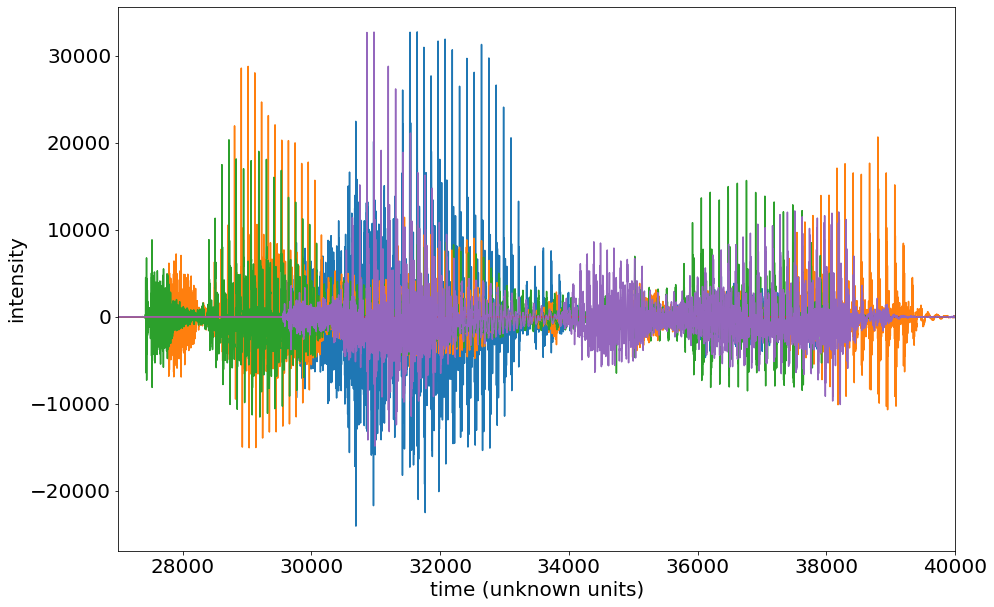

In [44]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.plot(wavfiles[0])
plt.plot(wavfiles[5])
plt.plot(wavfiles[10])
plt.plot(wavfiles[15])
plt.plot(wavfiles[20])
plt.xlim(27000, 40000)
plt.xlabel("time (unknown units)", fontsize=20)
plt.ylabel("intensity", fontsize=20);

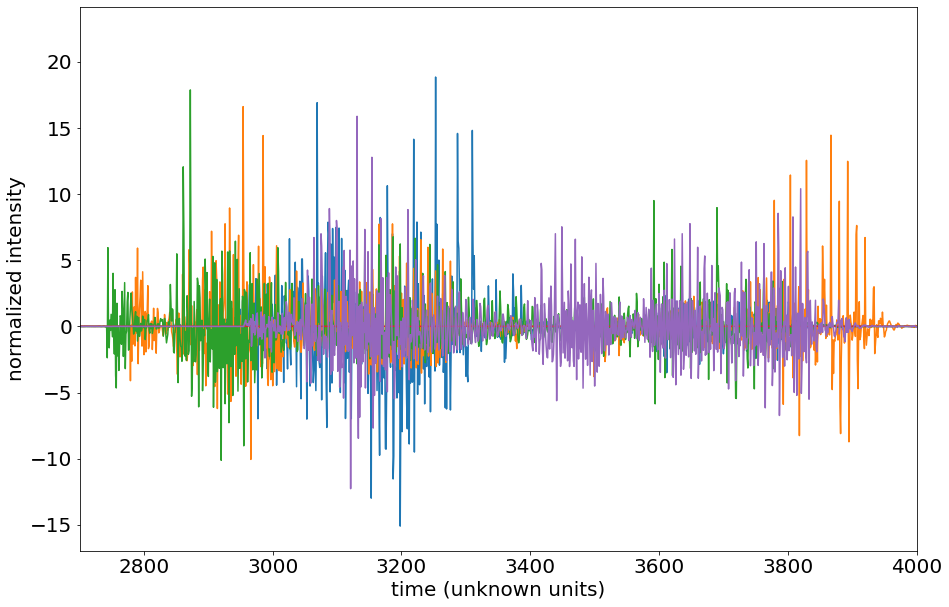

In [45]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.plot(X[0])
plt.plot(X[5])
plt.plot(X[10])
plt.plot(X[15])
plt.plot(X[20])
plt.xlim(2700, 4000)
plt.xlabel("time (unknown units)", fontsize=20)
plt.ylabel("normalized intensity", fontsize=20);

## Calculating distance between sound bites